In [14]:
### This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/higgs-uci-dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        


/kaggle/input/higgs-uci-dataset/HIGGS.csv


First few rows of the dataset:
         label  feature_1  feature_2  feature_3  feature_4  feature_5  \
3967303    0.0   1.138683  -0.726635  -0.005790   0.204118   0.153842   
5946179    1.0   0.404633   1.014821  -1.050041   1.136441  -1.403536   
6910558    0.0   1.137585   0.325251   1.453598   0.804114   0.893516   
3414332    0.0   1.380438  -0.595149  -0.727112   0.465392  -0.057453   
5840458    1.0   0.962628   1.191110  -1.161568   1.541759   0.569159   

         feature_6  feature_7  feature_8  feature_9  ...  feature_19  \
3967303   1.585904  -0.045576  -1.448527   1.086538  ...   -2.439800   
5946179   3.218436  -1.944837   0.801788   0.000000  ...   -1.174742   
6910558   0.418095  -1.164536  -0.585919   0.000000  ...    0.280201   
3414332   0.399224  -0.076273   1.080084   2.173076  ...    1.261267   
5840458   1.337374   0.810973   0.458075   1.086538  ...    0.413452   

         feature_20  feature_21  feature_22  feature_23  feature_24  \
3967303    0.073642    0.0

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN be

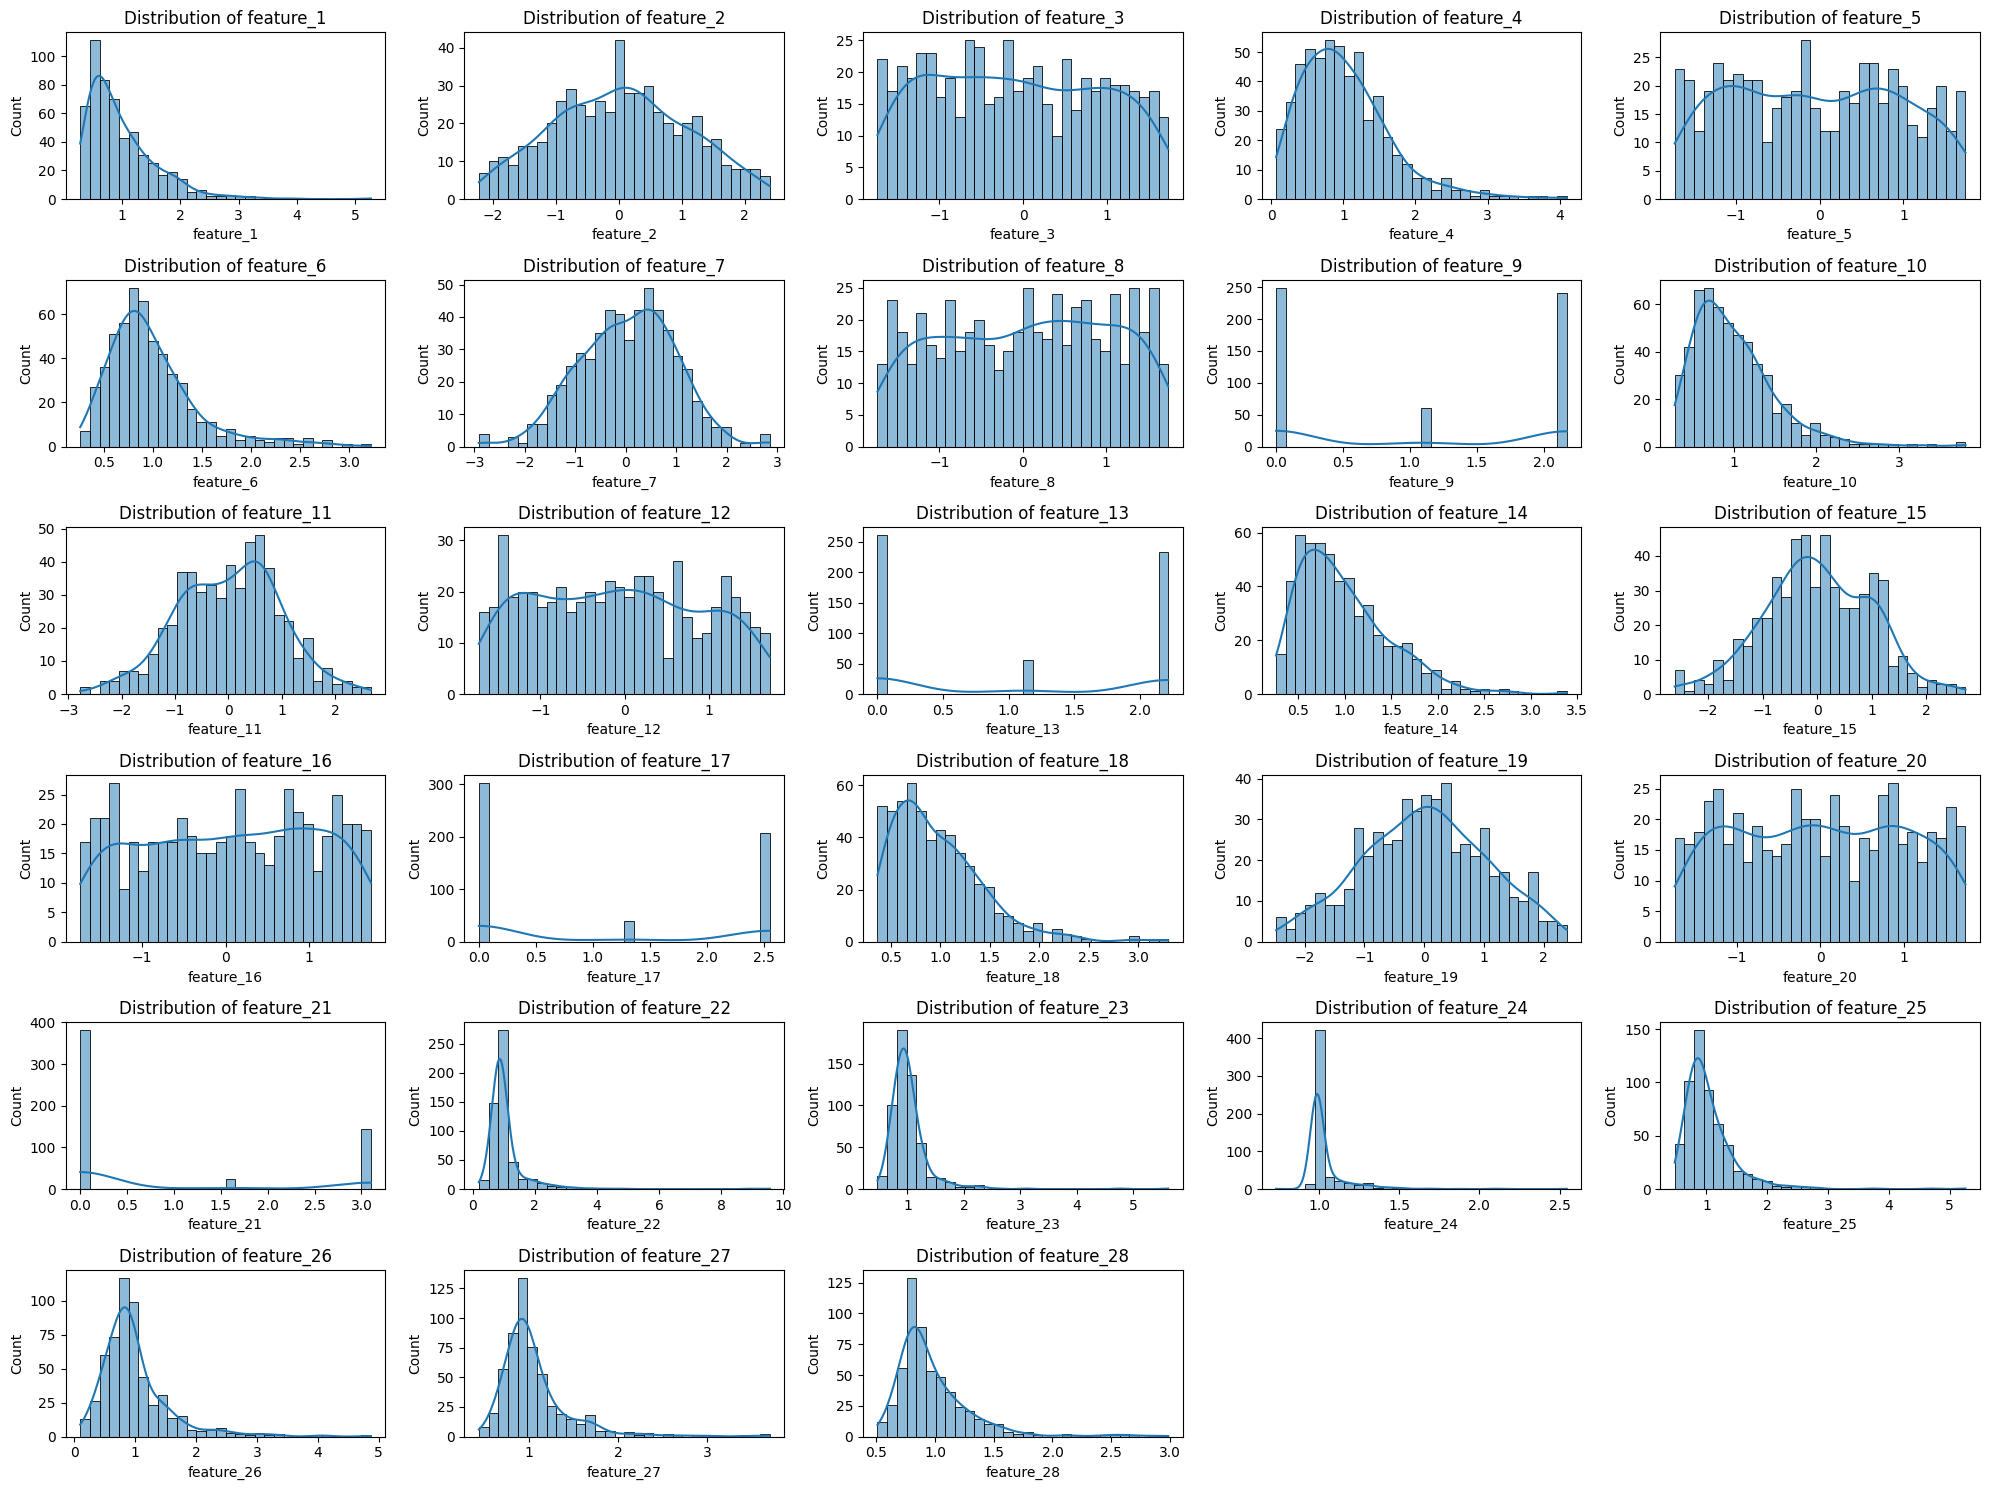

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Task 1: Data Preprocessing and Exploration 

# Load the dataset
data_sample = pd.read_csv('/kaggle/input/higgs-uci-dataset/HIGGS.csv', header=None)
data = data_sample.sample(frac=0.00005, random_state=42)

# Assign column names for better readability (assuming the first column is the label)
column_names = ['label'] + [f'feature_{i}' for i in range(1, data.shape[1])]
data.columns = column_names

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Visualize the distribution of each feature
plt.figure(figsize=(20, 15))
for i, col in enumerate(data.columns[1:], 1):  # Skip the class label
    plt.subplot(6, 5, i)
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# Check for outliers using box plots
plt.figure(figsize=(20, 15))
for i, col in enumerate(data.columns[1:], 1):
    plt.subplot(6, 5, i)
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()



In [16]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = data.iloc[:, 1:].values  # Features
y = data.iloc[:, 0].values    # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to DataFrame for ease of use later
X_scaled_df = pd.DataFrame(X_scaled, columns=data.columns[1:])
print("Standardized Features (First 5 Rows):")
print(X_scaled_df.head())

from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features (degree = 2 for example)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled_df)

# Convert back to DataFrame for better readability
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X_scaled_df.columns))
print("\nPolynomial Features (Degree 2, First 5 Rows):")
print(X_poly_df.head())

Standardized Features (First 5 Rows):
   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   0.258691  -0.700110   0.071063  -1.311156   0.203518   1.304554   
1  -0.967931   0.941497  -0.975236   0.180122  -1.358636   4.852886   
2   0.256856   0.291465   1.533312  -0.351444   0.945459  -1.233695   
3   0.662671  -0.576164  -0.651673  -0.893241  -0.008425  -1.274711   
4  -0.035503   1.107678  -1.086981   0.828440   0.620108   0.764370   

   feature_7  feature_8  feature_9  feature_10  ...  feature_19  feature_20  \
0  -0.086995  -1.495507   0.015412    1.181234  ...   -2.352149    0.072004   
1  -2.093610   0.752652  -1.044171    2.450949  ...   -1.133815   -0.906034   
2  -1.269203  -0.633725  -1.044171   -0.692013  ...    0.267391   -0.975375   
3  -0.119427   1.030682   1.074995   -0.709235  ...    1.212221    1.118729   
4   0.817970   0.409269   0.015412   -0.897434  ...    0.395721    1.297586   

   feature_21  feature_22  feature_23  feature_24  feature_2

In [17]:
##1.2 1.3 Feature Engineering


from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features (degree = 2 for example)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled_df)

# Convert back to DataFrame for better readability
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X_scaled_df.columns))
print("\n 1.3 Feature Engineering: Polynomial Features (Degree 2, First 5 Rows):")
print(X_poly_df.head())





 1.3 Feature Engineering: Polynomial Features (Degree 2, First 5 Rows):
   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   0.258691  -0.700110   0.071063  -1.311156   0.203518   1.304554   
1  -0.967931   0.941497  -0.975236   0.180122  -1.358636   4.852886   
2   0.256856   0.291465   1.533312  -0.351444   0.945459  -1.233695   
3   0.662671  -0.576164  -0.651673  -0.893241  -0.008425  -1.274711   
4  -0.035503   1.107678  -1.086981   0.828440   0.620108   0.764370   

   feature_7  feature_8  feature_9  feature_10  ...  feature_25^2  \
0  -0.086995  -1.495507   0.015412    1.181234  ...      0.435096   
1  -2.093610   0.752652  -1.044171    2.450949  ...      4.446701   
2  -1.269203  -0.633725  -1.044171   -0.692013  ...      0.175453   
3  -0.119427   1.030682   1.074995   -0.709235  ...      0.136744   
4   0.817970   0.409269   0.015412   -0.897434  ...      0.087880   

   feature_25 feature_26  feature_25 feature_27  feature_25 feature_28  \
0          

In [18]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE
from sklearn.svm import SVC


##1.4 Feature Selection

# Select the top k features using ANOVA F-value
k = 10  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_kbest = selector.fit_transform(X_poly, y)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)
selected_features = X_poly_df.columns[selected_indices]
print(f"Selected Features using SelectKBest: {selected_features.tolist()}")



Selected Features using SelectKBest: ['feature_26', 'feature_6 feature_26', 'feature_9 feature_26', 'feature_10 feature_15', 'feature_10 feature_21', 'feature_10 feature_26', 'feature_21 feature_26', 'feature_26^2', 'feature_26 feature_27', 'feature_26 feature_28']


In [19]:
######Step 2: Linear SVM Implementation#######

from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.pipeline import make_pipeline

# Create a linear SVM model
linear_svm = SVC(kernel='linear', random_state=42)

# Implementing cross-validation
cv_scores = cross_val_score(linear_svm, X_scaled, y, cv=5, scoring='accuracy')
print(f"Cross-validated accuracy scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.4f}")

# Fit the model to the whole dataset
linear_svm.fit(X_scaled, y)

# Predictions
y_pred = linear_svm.predict(X_scaled)

# Calculate and report key classification metrics
print(classification_report(y, y_pred))

# Compute AUC
y_prob = linear_svm.decision_function(X_scaled)  # Get the decision scores
auc = roc_auc_score(y, y_prob)
print(f"AUC: {auc:.4f}")


Cross-validated accuracy scores: [0.61818182 0.66363636 0.62727273 0.57272727 0.47272727]
Mean accuracy: 0.5909
              precision    recall  f1-score   support

         0.0       0.66      0.49      0.56       263
         1.0       0.62      0.77      0.69       287

    accuracy                           0.64       550
   macro avg       0.64      0.63      0.63       550
weighted avg       0.64      0.64      0.63       550

AUC: 0.6934


In [20]:
#####Stochastic Gradient Descent with SVM#####
from sklearn.linear_model import SGDClassifier

# Create an SGD classifier with hinge loss (equivalent to SVM)
sgd_svm = SGDClassifier(loss='hinge', random_state=42)

# Implementing cross-validation
cv_scores_sgd = cross_val_score(sgd_svm, X_scaled, y, cv=5, scoring='accuracy')
print(f"SGD Cross-validated accuracy scores: {cv_scores_sgd}")
print(f"SGD Mean accuracy: {cv_scores_sgd.mean():.4f}")

# Fit the model to the whole dataset
sgd_svm.fit(X_scaled, y)

# Predictions
y_pred_sgd = sgd_svm.predict(X_scaled)

# Calculate and report key classification metrics
print(classification_report(y, y_pred_sgd))

# Compute AUC for SGD model
y_prob_sgd = sgd_svm.decision_function(X_scaled)  # Get the decision scores
auc_sgd = roc_auc_score(y, y_prob_sgd)
print(f"SGD AUC: {auc_sgd:.4f}")


SGD Cross-validated accuracy scores: [0.63636364 0.58181818 0.6        0.53636364 0.46363636]
SGD Mean accuracy: 0.5636
              precision    recall  f1-score   support

         0.0       0.55      0.68      0.61       263
         1.0       0.63      0.49      0.55       287

    accuracy                           0.58       550
   macro avg       0.59      0.59      0.58       550
weighted avg       0.59      0.58      0.58       550

SGD AUC: 0.6210


In [21]:

##################SVM with Polynomial, RBF, and Custom Kernels#########

from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid for polynomial kernel
param_dist_poly = {
    'C': [0.01, 0.1, 1, 10],
    'degree': [2, 3, 4]
}

# Create an SVM model with a polynomial kernel
svm_poly = SVC(kernel='poly', random_state=42)

# Perform randomized search to find the best hyperparameters
random_search_poly = RandomizedSearchCV(svm_poly, param_dist_poly, n_iter=5, scoring='accuracy', cv=5, random_state=42)
random_search_poly.fit(X_scaled, y)

# Best parameters and estimator
best_poly = random_search_poly.best_estimator_
print(f"Best parameters for Polynomial Kernel: {random_search_poly.best_params_}")

# Evaluate the best model
y_pred_poly = best_poly.predict(X_scaled)
print(classification_report(y, y_pred_poly))
auc_poly = roc_auc_score(y, best_poly.decision_function(X_scaled))
print(f"AUC (Polynomial Kernel): {auc_poly:.4f}")


Best parameters for Polynomial Kernel: {'degree': 2, 'C': 10}
              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89       263
         1.0       0.89      0.91      0.90       287

    accuracy                           0.90       550
   macro avg       0.90      0.90      0.90       550
weighted avg       0.90      0.90      0.90       550

AUC (Polynomial Kernel): 0.9568


In [22]:
# Define parameter grid for RBF kernel
from sklearn.model_selection import GridSearchCV
param_grid_rbf = {
    'C': [0.01, 0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1, 10]
}

# Create an SVM model with RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)

# Perform grid search to find the best hyperparameters
grid_search_rbf = GridSearchCV(svm_rbf, param_grid_rbf, scoring='accuracy', cv=5)
grid_search_rbf.fit(X_scaled, y)



# Best parameters and estimator
best_rbf = grid_search_rbf.best_estimator_
print(f"Best parameters for RBF Kernel: {grid_search_rbf.best_params_}")

# Evaluate the best model
y_pred_rbf = best_rbf.predict(X_scaled)
print(classification_report(y, y_pred_rbf))
auc_rbf = roc_auc_score(y, best_rbf.decision_function(X_scaled))
print(f"AUC (RBF Kernel): {auc_rbf:.4f}")


Best parameters for RBF Kernel: {'C': 1, 'gamma': 0.01}
              precision    recall  f1-score   support

         0.0       0.81      0.43      0.56       263
         1.0       0.63      0.91      0.75       287

    accuracy                           0.68       550
   macro avg       0.72      0.67      0.65       550
weighted avg       0.72      0.68      0.66       550

AUC (RBF Kernel): 0.7779


In [23]:
from sklearn.metrics.pairwise import rbf_kernel, linear_kernel

def custom_kernel(X, Y):
    return rbf_kernel(X, Y) + linear_kernel(X, Y)

# Create an SVM model with custom kernel
svm_custom = SVC(kernel=custom_kernel, random_state=42)

# Tune C using Grid Search
param_grid_custom = {
    'C': [0.01, 0.1, 1, 10]
}

# Perform grid search for custom kernel
grid_search_custom = GridSearchCV(svm_custom, param_grid_custom, scoring='accuracy', cv=5)
grid_search_custom.fit(X_scaled, y)

# Best parameters and estimator
best_custom = grid_search_custom.best_estimator_
print(f"Best parameters for Custom Kernel: {grid_search_custom.best_params_}")

# Evaluate the best model
y_pred_custom = best_custom.predict(X_scaled)
print(classification_report(y, y_pred_custom))
auc_custom = roc_auc_score(y, best_custom.decision_function(X_scaled))
print(f"AUC (Custom Kernel): {auc_custom:.4f}")


Best parameters for Custom Kernel: {'C': 0.01}
              precision    recall  f1-score   support

         0.0       0.75      0.35      0.48       263
         1.0       0.60      0.89      0.72       287

    accuracy                           0.63       550
   macro avg       0.67      0.62      0.60       550
weighted avg       0.67      0.63      0.60       550

AUC (Custom Kernel): 0.6809


In [24]:
#######################Time Complexity Analysis###############
import time
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

# Assume X_scaled and y are already defined
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Define and train models with fixed parameters
# Polynomial Kernel
poly_model = SVC(kernel='poly', C=1.0, degree=3)  # Example degree
# RBF Kernel
rbf_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # Using default gamma
# Custom Kernel (Sigmoid)
custom_model = SVC(kernel='sigmoid', C=1.0)

# Function to measure training and prediction time and report classification metrics
def time_complexity(model, X_train, X_test, y_train, y_test):
    # Measure training time
    start_train = time.time()
    model.fit(X_train, y_train)
    end_train = time.time()

    # Measure prediction time
    start_predict = time.time()
    y_pred = model.predict(X_test)
    end_predict = time.time()

    train_time = end_train - start_train
    predict_time = end_predict - start_predict

    print(f"Training time: {train_time:.4f} seconds")
    print(f"Prediction time: {predict_time:.4f} seconds")
    
    # Print classification metrics
    print(classification_report(y_test, y_pred))
    auc = roc_auc_score(y_test, model.decision_function(X_test))
    print(f"AUC: {auc:.4f}")

# Evaluate each model
print("\nEvaluating Polynomial Kernel:")
time_complexity(poly_model, X_train, X_test, y_train, y_test)

print("\nEvaluating RBF Kernel:")
time_complexity(rbf_model, X_train, X_test, y_train, y_test)

print("\nEvaluating Custom Kernel (Sigmoid):")
time_complexity(custom_model, X_train, X_test, y_train, y_test)



Evaluating Polynomial Kernel:
Training time: 0.0336 seconds
Prediction time: 0.0077 seconds
              precision    recall  f1-score   support

         0.0       0.86      0.15      0.26        79
         1.0       0.56      0.98      0.71        86

    accuracy                           0.58       165
   macro avg       0.71      0.56      0.48       165
weighted avg       0.70      0.58      0.49       165

AUC: 0.6930

Evaluating RBF Kernel:
Training time: 0.0113 seconds
Prediction time: 0.0062 seconds
              precision    recall  f1-score   support

         0.0       0.69      0.43      0.53        79
         1.0       0.61      0.83      0.70        86

    accuracy                           0.64       165
   macro avg       0.65      0.63      0.62       165
weighted avg       0.65      0.64      0.62       165

AUC: 0.6632

Evaluating Custom Kernel (Sigmoid):
Training time: 0.0341 seconds
Prediction time: 0.0041 seconds
              precision    recall  f1-score 

In [25]:
#######################Hyperparameter Tuning###################
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from skopt import BayesSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Hyperparameter tuning for Polynomial Kernel
poly_params = {'C': [0.1, 1, 10], 'degree': [2, 3, 4]}
poly_search = BayesSearchCV(SVC(kernel='poly'), poly_params, n_iter=10, cv=5)
poly_search.fit(X_train, y_train)
print("Best Polynomial Parameters:", poly_search.best_params_)

rbf_sensitivity = BayesSearchCV(SVC(kernel='rbf'), {'C': [0.1, 1, 10,100], 'gamma': ['scale', 'auto']}, n_iter=9, cv=5, return_train_score=True)
rbf_sensitivity.fit(X_train, y_train)
results = rbf_sensitivity.cv_results_

# Extract C and gamma values along with their corresponding mean test scores
C_vals = rbf_sensitivity.cv_results_['param_C'].data
gamma_vals = rbf_sensitivity.cv_results_['param_gamma'].data
mean_test_scores = rbf_sensitivity.cv_results_['mean_test_score']

# Create a pivot table to properly plot a heatmap
heatmap_data = np.zeros((len(np.unique(C_vals)), len(np.unique(gamma_vals))))

for i, (C, gamma, score) in enumerate(zip(C_vals, gamma_vals, mean_test_scores)):
    C_idx = np.where(np.unique(C_vals) == C)[0][0]
    gamma_idx = np.where(np.unique(gamma_vals) == gamma)[0][0]
    heatmap_data[C_idx, gamma_idx] = score

# Plot the heatmap
sns.heatmap(heatmap_data, annot=True, cmap="viridis", xticklabels=np.unique(gamma_vals), yticklabels=np.unique(C_vals))
plt.title('RBF Kernel Sensitivity to C and Gamma')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.show()


Best Polynomial Parameters: OrderedDict([('C', 1), ('degree', 2)])


In [31]:
print(X_scaled.columns if isinstance(X_train, pd.DataFrame) else "No feature names (numpy array)")

No feature names (numpy array)


In [ ]:
##SHAP

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score
import shap
import lime
import lime.lime_tabular


# X_scaled and y should be defined here
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Define and fit the models with probability=True
# Polynomial Kernel
best_poly = SVC(kernel='poly', degree=3, probability=True)
best_poly.fit(X_train, y_train)

# RBF Kernel
best_rbf = SVC(kernel='rbf', probability=True)
best_rbf.fit(X_train, y_train)

# Custom Kernel (Sigmoid)
best_custom = SVC(kernel='sigmoid', probability=True)
best_custom.fit(X_train, y_train)

# Evaluate each model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Evaluate each kernel
print("\nEvaluating Polynomial Kernel:")
evaluate_model(best_poly, X_test, y_test)

print("\nEvaluating RBF Kernel:")
evaluate_model(best_rbf, X_test, y_test)

print("\nEvaluating Custom Kernel (Sigmoid):")
evaluate_model(best_custom, X_test, y_test)

# SHAP Analysis for RBF Kernel
explainer = shap.KernelExplainer(best_rbf.predict_proba, X_scaled)  
shap_values = explainer.shap_values(X_test)

# Visualize SHAP values
shap.summary_plot(shap_values, X_test, feature_names=[f'feature_{i}' for i in range(X_test.shape[1])])

# LIME Analysis
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, 
                                                      feature_names=[f'feature_{i}' for i in range(X_train.shape[1])],  # Use generic feature names
                                                      class_names=['Background', 'Signal'], 
                                                      discretize_continuous=True)

# Explain a single prediction (select instance by index)
i = 0  # Index of the instance you want to explain
t = explainer.explain_instance(X_test[i], best_rbf.predict_proba)

# Show LIME explanation
t.show_in_notebook()




Evaluating Polynomial Kernel:

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.15      0.26        79
         1.0       0.56      0.98      0.71        86

    accuracy                           0.58       165
   macro avg       0.71      0.56      0.48       165
weighted avg       0.70      0.58      0.49       165

ROC AUC Score: 0.6922284368560494

Evaluating RBF Kernel:

Classification Report:
              precision    recall  f1-score   support

         0.0       0.69      0.43      0.53        79
         1.0       0.61      0.83      0.70        86

    accuracy                           0.64       165
   macro avg       0.65      0.63      0.62       165
weighted avg       0.65      0.64      0.62       165

ROC AUC Score: 0.6627906976744187

Evaluating Custom Kernel (Sigmoid):

Classification Report:
              precision    recall  f1-score   support

         0.0       0.59      0.48      0.53        79
     

  0%|          | 0/165 [00:00<?, ?it/s]